# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

city="Manila"
city_url = url+f"&q={city}"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 120.9822, 'lat': 14.6042},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 298.85,
  'feels_like': 299.9,
  'temp_min': 298.74,
  'temp_max': 299.81,
  'pressure': 1011,
  'humidity': 93,
  'sea_level': 1011,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 0.89, 'deg': 25, 'gust': 2.24},
 'clouds': {'all': 40},
 'dt': 1729030633,
 'sys': {'type': 2,
  'id': 2008256,
  'country': 'PH',
  'sunrise': 1729028841,
  'sunset': 1729071334},
 'timezone': 28800,
 'id': 1701668,
 'name': 'Manila',
 'cod': 200}

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | czarna bialostocka
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | palikir - national government center
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | nizhneudinsk
Processing Record 12 of Set 1 | butha-buthe
Processing Record 13 of Set 1 | tawau
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | staritsa
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of S

Processing Record 38 of Set 4 | flin flon
Processing Record 39 of Set 4 | klyuchi
Processing Record 40 of Set 4 | bucerias
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | ahar
Processing Record 43 of Set 4 | serov
Processing Record 44 of Set 4 | prenzlau
Processing Record 45 of Set 4 | mana
Processing Record 46 of Set 4 | hafnarfjordur
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | whakatane
Processing Record 49 of Set 4 | freeport
Processing Record 0 of Set 5 | sorong
Processing Record 1 of Set 5 | namtsy
Processing Record 2 of Set 5 | serowe
Processing Record 3 of Set 5 | ciudad lazaro cardenas
Processing Record 4 of Set 5 | hard
Processing Record 5 of Set 5 | lyantonde
Processing Record 6 of Set 5 | okhotsk
Processing Record 7 of Set 5 | port mathurin
Processing Record 8 of Set 5 | homer
Processing Record 9 of Set 5 | selfoss
Processing Record 10 of Set 5 | trincomalee
Processing Record 11 of Set 5 | el granada
Processing Record

Processing Record 30 of Set 8 | kavieng
Processing Record 31 of Set 8 | kuressaare
Processing Record 32 of Set 8 | masterton
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | holualoa
Processing Record 35 of Set 8 | pangoa
Processing Record 36 of Set 8 | bontang
Processing Record 37 of Set 8 | mirnyy
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | atafu village
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | i-n-salah
Processing Record 43 of Set 8 | tazacorte
Processing Record 44 of Set 8 | tindouf
Processing Record 45 of Set 8 | vorgashor
Processing Record 46 of Set 8 | new norfolk
Processing Record 47 of Set 8 | nema
Processing Record 48 of Set 8 | fortuna
Processing Record 49 of Set 8 | san ramon
Processing Record 0 of Set 9 | vadso
Processing Record 1 of Set 9 | jianshui
Processing Record 2 of Set 9 | arraial do cabo
Processing Record 3 of Set 9 | jokioinen
Processing Recor

City not found. Skipping...
Processing Record 23 of Set 12 | vicuna
Processing Record 24 of Set 12 | port isabel
Processing Record 25 of Set 12 | pervomayskoye
Processing Record 26 of Set 12 | trairi
Processing Record 27 of Set 12 | alaghsas
Processing Record 28 of Set 12 | marathon
Processing Record 29 of Set 12 | kidal
Processing Record 30 of Set 12 | axim
Processing Record 31 of Set 12 | kabwe
Processing Record 32 of Set 12 | nampula
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12 | hami
Processing Record 35 of Set 12 | sangin
Processing Record 36 of Set 12 | nizhnyaya tavda
Processing Record 37 of Set 12 | chaoyang
Processing Record 38 of Set 12 | nago
Processing Record 39 of Set 12 | ranau
Processing Record 40 of Set 12 | mil'kovo
Processing Record 41 of Set 12 | caleta de carquin
Processing Record 42 of Set 12 | riohacha
Processing Record 43 of Set 12 | kulia village
City not found. Skipping...
Processing Record 44 of Set 12 | pimentel
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.38,72,19,17.40,TF,1729030681
1,blackmans bay,-43.0167,147.3167,12.63,62,95,3.13,AU,1729030682
2,happy valley-goose bay,53.3168,-60.3315,2.17,93,100,4.63,CA,1729030509
3,adamstown,-25.0660,-130.1015,21.25,85,92,7.32,PN,1729030684
4,czarna bialostocka,53.3051,23.2815,5.46,90,18,2.60,PL,1729030685


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.38,72,19,17.40,TF,1729030681
1,blackmans bay,-43.0167,147.3167,12.63,62,95,3.13,AU,1729030682
2,happy valley-goose bay,53.3168,-60.3315,2.17,93,100,4.63,CA,1729030509
3,adamstown,-25.0660,-130.1015,21.25,85,92,7.32,PN,1729030684
4,czarna bialostocka,53.3051,23.2815,5.46,90,18,2.60,PL,1729030685


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

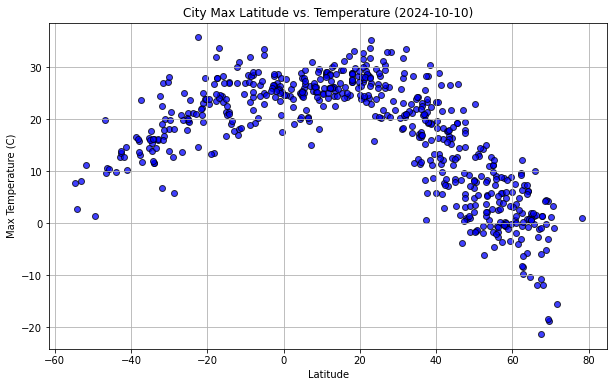

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

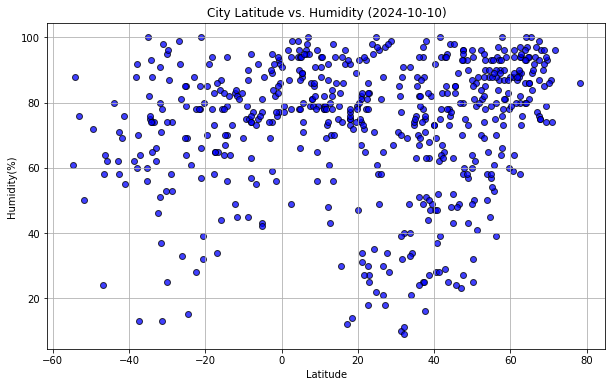

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

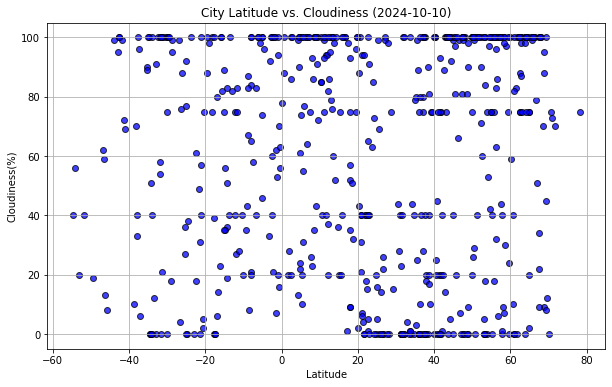

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

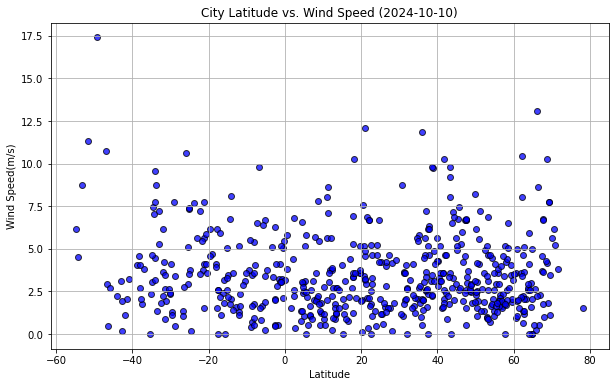

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-10-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}" 
    
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    
    return slope, intercept, r_value, p_value, std_err

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,happy valley-goose bay,53.3168,-60.3315,2.17,93,100,4.63,CA,1729030509
4,czarna bialostocka,53.3051,23.2815,5.46,90,18,2.60,PL,1729030685
5,qaqortoq,60.7167,-46.0333,0.53,88,10,0.96,GL,1729030686
6,palikir - national government center,6.9248,158.1611,26.47,100,100,2.57,FM,1729030688
8,bethel,41.3712,-73.4140,11.42,62,20,3.60,US,1729030414


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.38,72,19,17.40,TF,1729030681
1,blackmans bay,-43.0167,147.3167,12.63,62,95,3.13,AU,1729030682
3,adamstown,-25.0660,-130.1015,21.25,85,92,7.32,PN,1729030684
7,edinburgh of the seven seas,-37.0676,-12.3116,11.79,64,6,3.81,SH,1729030689
9,grytviken,-54.2811,-36.5092,2.76,88,56,4.54,GS,1729030691


###  Temperature vs. Latitude Linear Regression Plot

In [18]:
print(northern_hemi_df[['Lat', 'Max Temp']].head())
print(northern_hemi_df[['Lat', 'Max Temp']].isnull().sum())

             Lat  Max Temp
City_ID                   
2        53.3168      2.17
4        53.3051      5.46
5        60.7167      0.53
6         6.9248     26.47
8        41.3712     11.42
Lat         0
Max Temp    0
dtype: int64


In [19]:
print(northern_hemi_df[['Lat', 'Max Temp']].dtypes)

Lat         float64
Max Temp    float64
dtype: object


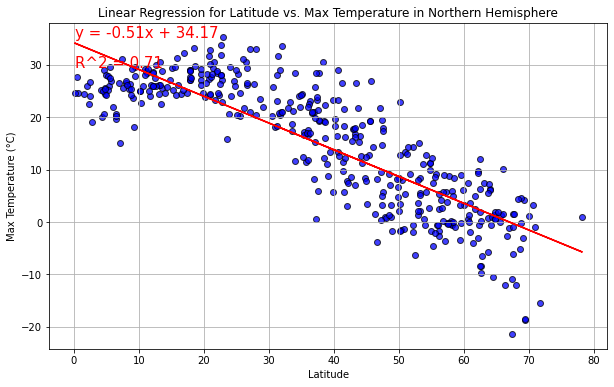

In [34]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R^2 = {round(r_value**2, 2)}"  # R-squared value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max()-y_values.min())*0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Example usage for Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 
    'Linear Regression for Latitude vs. Max Temperature in Northern Hemisphere'
)

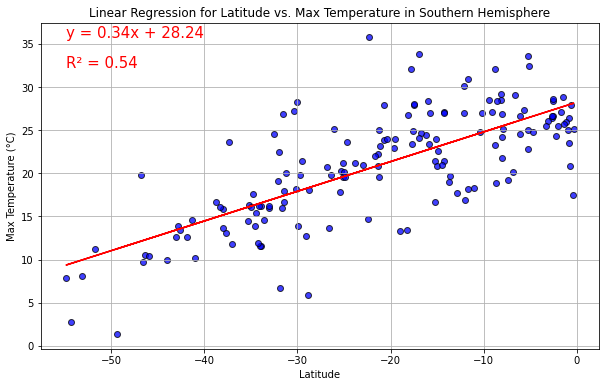

In [22]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Example usage for Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 
    'Linear Regression for Latitude vs. Max Temperature in Southern Hemisphere'
)

**Discussion about the linear relationship:** The correlation of the two plot charts is the closer you are to the equator, the hotter it is. The linear regression lines are displaying the cities in the northern and southern hemisphere and plotting the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

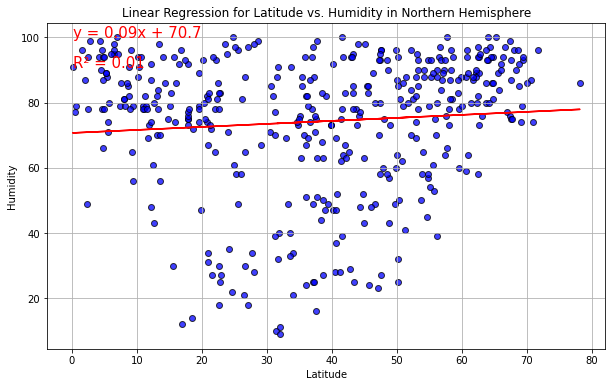

In [24]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Example usage for Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 
    'Linear Regression for Latitude vs. Humidity in Northern Hemisphere'
)

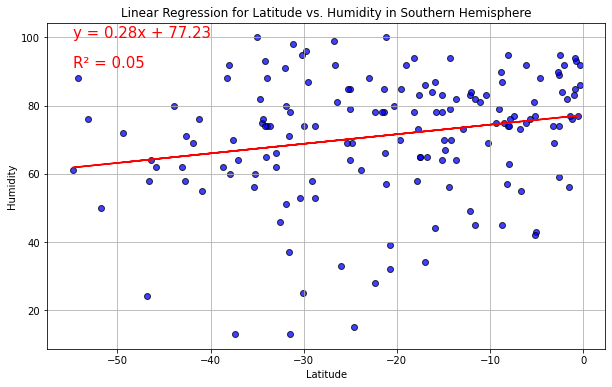

In [25]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 
    'Linear Regression for Latitude vs. Humidity in Southern Hemisphere'
)

**Discussion about the linear relationship:** There is no correlation although it is interesting to note there is more humidity in the northen hemisphere. I'd like to state while looking at a map, there is more land mass found above the equator, therefore more cities can be located in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

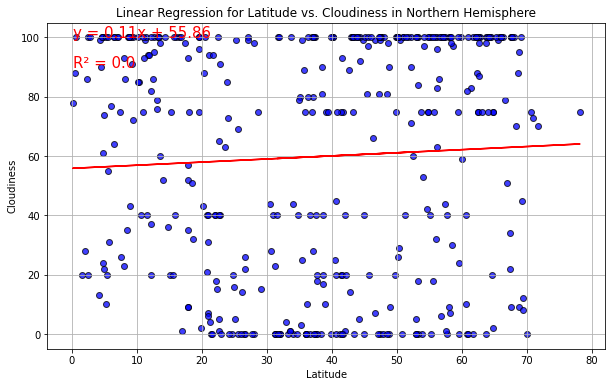

In [35]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 
    'Linear Regression for Latitude vs. Cloudiness in Northern Hemisphere'
)

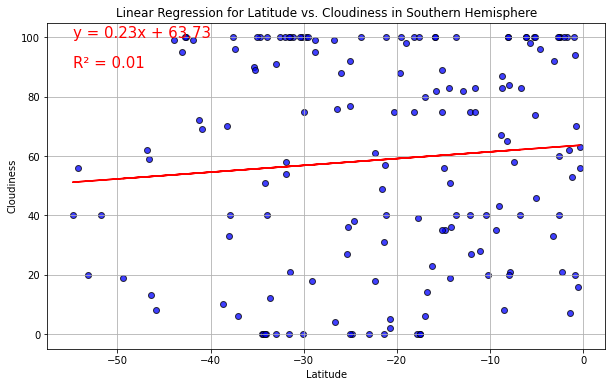

In [37]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 
    'Linear Regression for Latitude vs. Cloudiness in Southern Hemisphere'
)

**Discussion about the linear relationship:** There is no correlation between the regression lines in the northen and southern plots, yet an observation I've made is there are visibly less cloudiness dots in the center of the equator and the dots are condensed around 100 and 0.

### Wind Speed vs. Latitude Linear Regression Plot

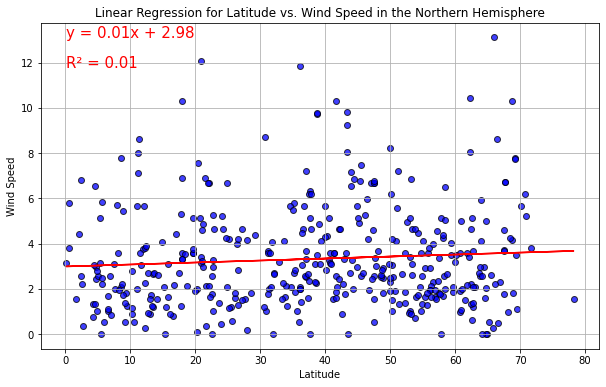

In [38]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 
    'Linear Regression for Latitude vs. Wind Speed in the Northern Hemisphere'
)

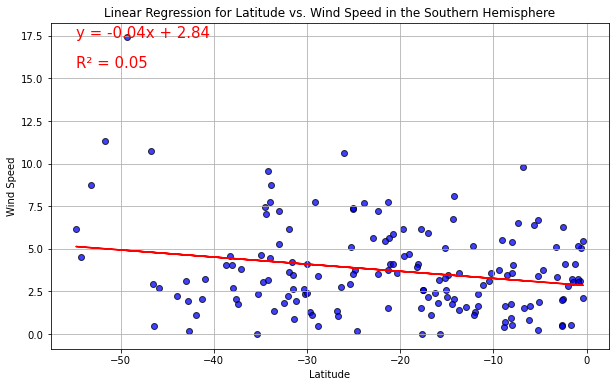

In [39]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_squared = f"R² = {round(r_value**2, 2)}"  # R² value

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', color='blue', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max() - (y_values.max() - y_values.min()) * 0.1), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 
    'Linear Regression for Latitude vs. Wind Speed in the Southern Hemisphere'
)

**Discussion about the linear relationship:** There is no correlation between northern and southern windspeed, although both charts show an outlier.